# Neural Network Basics

## Topics Covered:

1. Linear Layers
   
   - Understanding linear transformations
   - Implementation in PyTorch
   - Bias terms

2. Activation Functions
   - ReLU, Sigmoid, Tanh
   - When to use each
   - Implementation and visualization

3. Building Neural Network Modules
   - nn.Module class
   - Creating custom layers
   - Forward method implementation

4. Loss Functions
   - Common loss functions
   - When to use each
   - Implementation examples

5. Optimizers
   - SGD
   - Adam
   - Learning rate selection

6. Basic Training Loops
   - Forward pass
   - Loss computation
   - Backward pass
   - Parameter updates

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

## Linear Layers

A linear layer performs the operation:
y = Wx + b

Let us implement this in PyTorch

In [2]:
# create a linear layer
in_features = 3
out_features = 2

linear_layer = nn.Linear(in_features, out_features)

# print the layer parameters
print(linear_layer.weight)
print(linear_layer.bias)


Parameter containing:
tensor([[ 0.0642,  0.2635, -0.1753],
        [-0.1713,  0.1433, -0.3904]], requires_grad=True)
Parameter containing:
tensor([-0.1881, -0.1414], requires_grad=True)


In [3]:
linear_layer.weight.shape

torch.Size([2, 3])

In [4]:
linear_layer.bias.shape

torch.Size([2])

In [5]:
# create an input tensor
x = torch.tensor([1.0, 2.0, 3.0])

In [6]:
y = linear_layer(x)

In [7]:
y.shape

torch.Size([2])

In [8]:
y

tensor([-0.1228, -1.1972], grad_fn=<ViewBackward0>)

In [9]:
# manual computation yielding the same results:
manual_y = x @ linear_layer.weight.T + linear_layer.bias
manual_y

tensor([-0.1228, -1.1972], grad_fn=<AddBackward0>)

## Training a Linear Layer

Now that we understand how a linear layer transforms input, let's see how it learns. We'll:
1. Create a simple regression problem
2. Use a linear layer to solve it
3. Train the layer using gradient descent

Our task: Learn the transformation y = 2x + 1
- This is a simple linear relationship
- The weight should learn to be close to 2
- The bias should learn to be close to 1

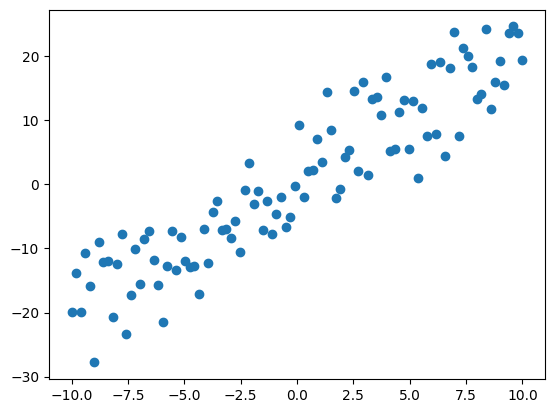

In [10]:
# Create synthetic data
x = torch.linspace(-10, 10, 100).reshape(-1, 1)  # Input values
y_true = 2 * x + 1  # True relationship we want to learn

# Add noise to the data
y = y_true + torch.normal(mean=0, std=5, size=x.shape)

# Plot the data
plt.scatter(x, y, label='Noisy data')

In [11]:
# Defining the right linear layer for this problem
linear_layer = nn.Linear(in_features=1, out_features=1)

# one input feature x, and one output feature y

In [12]:
# Checking the initialization parameters
linear_layer.weight
linear_layer.bias



Parameter containing:
tensor([0.9044], requires_grad=True)

In [13]:
# Define loss function for training
mse = nn.MSELoss()

# Define optimizer
optimizer = optim.SGD(linear_layer.parameters(), lr=0.01, momentum=0)



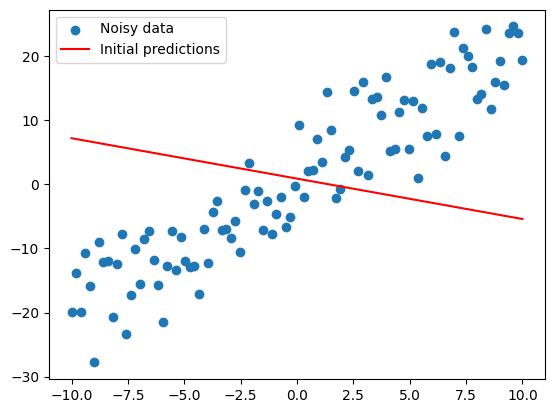

In [14]:
# initial state before training

# Let's see what we predict before we start training

y_pred = linear_layer(x)

# Plot the data and the predictions
plt.scatter(x, y, label='Noisy data')
plt.plot(x, y_pred.detach(), label='Initial predictions', color='red')
plt.legend()
plt.show()

# The method detached is required because
# a tensor with requires_grad=True is being used in the computation
# and cannot be used for plotting

In [15]:
# Setup training loop

n_epochs = 1000
losses = []

for epoch in range(n_epochs):
    #forward pass
    y_pred = linear_layer(x)
    # we consider that we don't have access to the true y values
    loss = mse(y_pred, y)
    losses.append(loss.item())

    #backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # remember that we gave the optimizer the parameters

Text(0, 0.5, 'Loss')

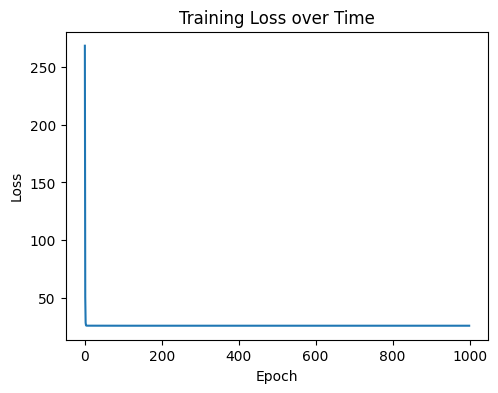

In [16]:
# visualizing loss (mse):

# Create a figure with two subplots
plt.figure(figsize=(12, 4))

# Plot 1: Training Loss
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Training Loss over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')

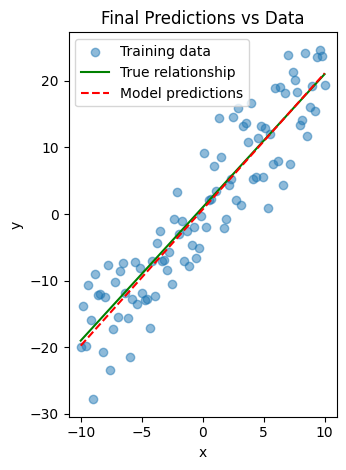

Final model parameters:
Weight: 2.0441
Bias: 0.6837


In [17]:
# Plot 2: Data, True Line, and Predictions
plt.subplot(1, 2, 2)
plt.scatter(x, y, alpha=0.5, label='Training data')
plt.plot(x, y_true, 'g-', label='True relationship')  # Adding the true line in green
plt.plot(x, y_pred.detach(), 'r--', label='Model predictions')  # Making predictions dashed for better distinction
plt.xlabel('x')
plt.ylabel('y')
plt.title('Final Predictions vs Data')
plt.legend()

plt.tight_layout()
plt.show()

# Print final model parameters
print("Final model parameters:")
print(f"Weight: {linear_layer.weight.item():.4f}")
print(f"Bias: {linear_layer.bias.item():.4f}")

In [18]:
# let us compare with sklearn to see if it is working

from sklearn.linear_model import LinearRegression

# Convert PyTorch tensors to numpy for sklearn
X_np = x.detach().numpy()
y_np = y.detach().numpy()

In [19]:
sk_linear = LinearRegression()
sk_linear.fit(X_np, y_np)

# Print sklearn's model parameters
print("\nSklearn's model parameters:")
print(f"Weight: {float(sk_linear.coef_[0]):.4f}")  # Convert to float first
print(f"Bias: {float(sk_linear.intercept_):.4f}")  # Convert to float first


Sklearn's model parameters:
Weight: 2.0441
Bias: 0.6837


## Activation Functions

In [55]:
x = torch.linspace(-3, 3, 100)

In [59]:
# define common activation functions
relu = nn.ReLU()
sigmoid = nn.Sigmoid()
tanh = nn.Tanh()
leaky_relu = nn.LeakyReLU(negative_slope=0.1)

In [60]:
# apply activation functions
y_relu = relu(x)
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_leaky_relu = leaky_relu(x)


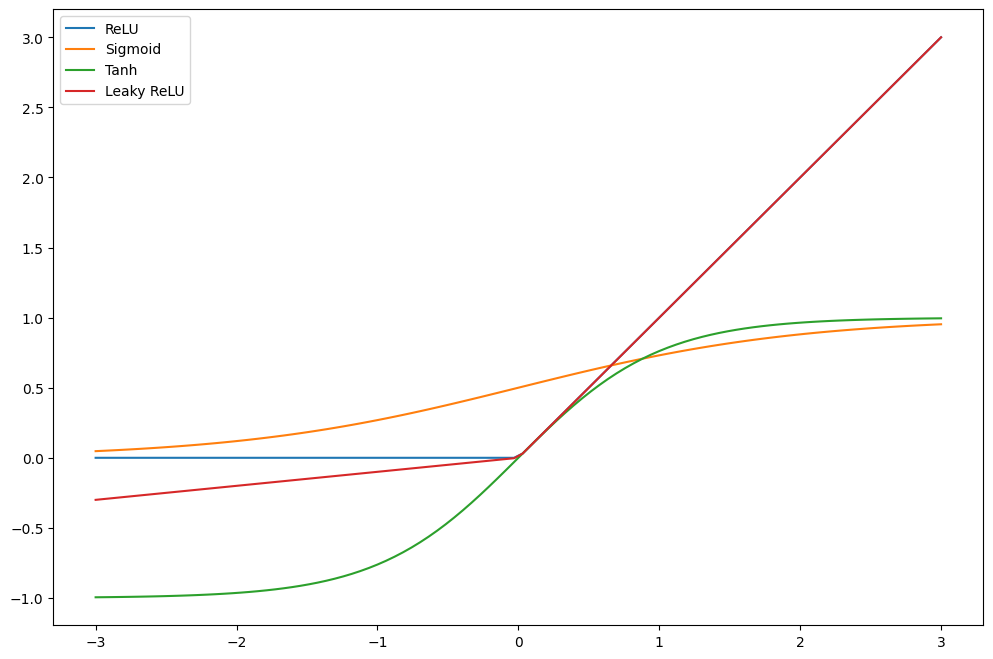

In [61]:
# plot all activation functions
plt.figure(figsize=(12, 8))
plt.plot(x, y_relu, label='ReLU')
plt.plot(x, y_sigmoid, label='Sigmoid')
plt.plot(x, y_tanh, label='Tanh')
plt.plot(x, y_leaky_relu, label='Leaky ReLU')
plt.legend()

In [62]:
# Looking at their derivatives
x.requires_grad_(True)

tensor([-3.0000, -2.9394, -2.8788, -2.8182, -2.7576, -2.6970, -2.6364, -2.5758,
        -2.5152, -2.4545, -2.3939, -2.3333, -2.2727, -2.2121, -2.1515, -2.0909,
        -2.0303, -1.9697, -1.9091, -1.8485, -1.7879, -1.7273, -1.6667, -1.6061,
        -1.5455, -1.4848, -1.4242, -1.3636, -1.3030, -1.2424, -1.1818, -1.1212,
        -1.0606, -1.0000, -0.9394, -0.8788, -0.8182, -0.7576, -0.6970, -0.6364,
        -0.5758, -0.5152, -0.4545, -0.3939, -0.3333, -0.2727, -0.2121, -0.1515,
        -0.0909, -0.0303,  0.0303,  0.0909,  0.1515,  0.2121,  0.2727,  0.3333,
         0.3939,  0.4545,  0.5152,  0.5758,  0.6364,  0.6970,  0.7576,  0.8182,
         0.8788,  0.9394,  1.0000,  1.0606,  1.1212,  1.1818,  1.2424,  1.3030,
         1.3636,  1.4242,  1.4848,  1.5455,  1.6061,  1.6667,  1.7273,  1.7879,
         1.8485,  1.9091,  1.9697,  2.0303,  2.0909,  2.1515,  2.2121,  2.2727,
         2.3333,  2.3939,  2.4545,  2.5152,  2.5758,  2.6364,  2.6970,  2.7576,
         2.8182,  2.8788,  2.9394,  3.00

In [64]:
def compute_derivative(x, activation):
    x.grad = None
    y = activation(x)
    y.backward(torch.ones_like(y))

    return x.grad

In [65]:

# compute derivatives for all activation functions
relu_deriv = compute_derivative(x, relu)
sigmoid_deriv = compute_derivative(x, sigmoid)
tanh_deriv = compute_derivative(x, tanh)
leaky_relu_deriv = compute_derivative(x, leaky_relu)



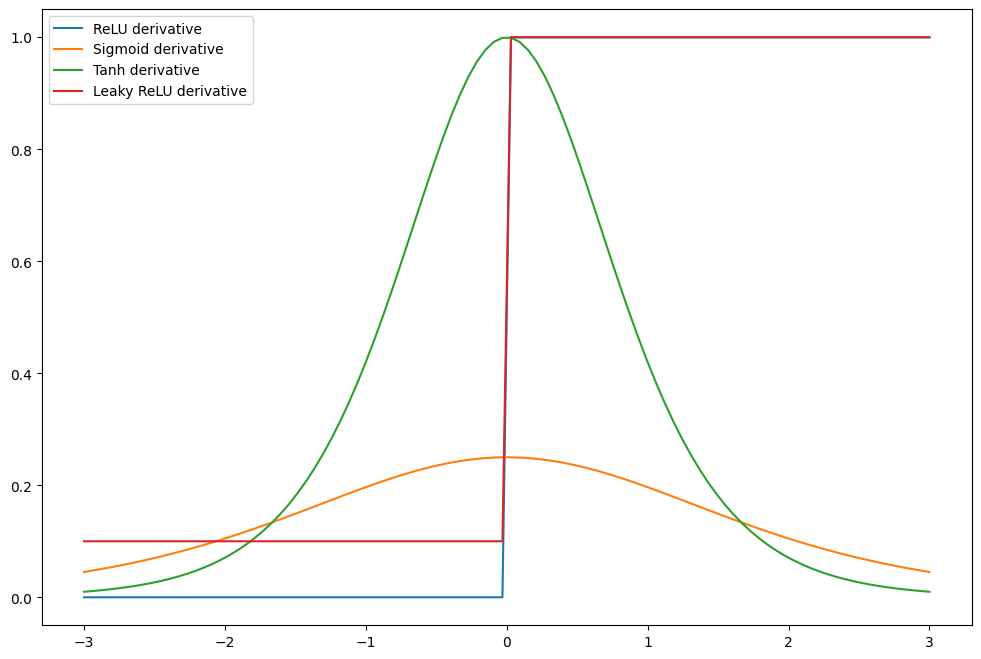

In [67]:
# plot derivatives
plt.figure(figsize=(12, 8))
plt.plot(x.detach().numpy(), relu_deriv, label='ReLU derivative')
plt.plot(x.detach().numpy(), sigmoid_deriv, label='Sigmoid derivative')
plt.plot(x.detach().numpy(), tanh_deriv, label='Tanh derivative')
plt.plot(x.detach().numpy(), leaky_relu_deriv, label='Leaky ReLU derivative')
plt.legend()

## Simple Neural Networks

In [82]:
# Create a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(1, 100)
        self.layer2 = nn.Linear(100, 100)
        self.layer3 = nn.Linear(100, 1)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.leaky_relu(self.layer1(x)) # first layer with leaky relu
        x = self.leaky_relu(self.layer2(x)) # second layer with leaky relu
        x = self.layer3(x) # third layer with sigmoid
        return x

# create the network
simple_nn = SimpleNN()

# print the network
print(simple_nn)



SimpleNN(
  (layer1): Linear(in_features=1, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer3): Linear(in_features=100, out_features=1, bias=True)
  (leaky_relu): LeakyReLU(negative_slope=0.1)
  (sigmoid): Sigmoid()
)


In [87]:
# Generate synthetic data
n_samples = 100
x = torch.rand(n_samples, 1)*10 - 5 # random values between -5 and 5
y_true = torch.sin(x) + 0.5 * torch.cos(2*x)

y = y_true + torch.normal(mean=0, std=0.2, size=x.shape)

# create and train simple NN

model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters( ), lr=0.1)

# training loop
n_epochs = 10000
losses = []

for epoch in range(n_epochs):
    # forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y)
    losses.append(loss.item())

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item():.4f}")

Epoch 100/10000, Loss: 0.1934
Epoch 200/10000, Loss: 0.1429
Epoch 300/10000, Loss: 0.1034
Epoch 400/10000, Loss: 0.0898
Epoch 500/10000, Loss: 0.0782
Epoch 600/10000, Loss: 0.0709
Epoch 700/10000, Loss: 0.0659
Epoch 800/10000, Loss: 0.0618
Epoch 900/10000, Loss: 0.0578
Epoch 1000/10000, Loss: 0.0552
Epoch 1100/10000, Loss: 0.0533
Epoch 1200/10000, Loss: 0.0524
Epoch 1300/10000, Loss: 0.0495
Epoch 1400/10000, Loss: 0.0494
Epoch 1500/10000, Loss: 0.0476
Epoch 1600/10000, Loss: 0.0463
Epoch 1700/10000, Loss: 0.0472
Epoch 1800/10000, Loss: 0.0458
Epoch 1900/10000, Loss: 0.0451
Epoch 2000/10000, Loss: 0.0456
Epoch 2100/10000, Loss: 0.0454
Epoch 2200/10000, Loss: 0.0444
Epoch 2300/10000, Loss: 0.0439
Epoch 2400/10000, Loss: 0.0495
Epoch 2500/10000, Loss: 0.0470
Epoch 2600/10000, Loss: 0.0478
Epoch 2700/10000, Loss: 0.0436
Epoch 2800/10000, Loss: 0.0426
Epoch 2900/10000, Loss: 0.0430
Epoch 3000/10000, Loss: 0.0432
Epoch 3100/10000, Loss: 0.0441
Epoch 3200/10000, Loss: 0.0435
Epoch 3300/10000,

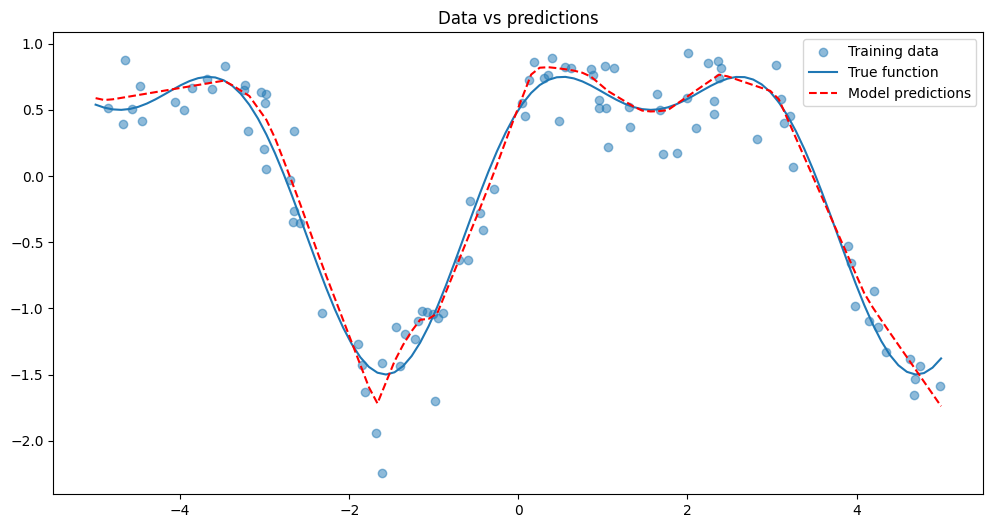

In [88]:
# for plotting, create evenly space x
x_plot = torch.linspace(-5, 5, 100).reshape(-1, 1)
y_true_plot = torch.sin(x_plot) + 0.5 * torch.cos(2*x_plot)
y_pred_plot = model(x_plot)

# plot the results
plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Training data', alpha=0.5)
plt.plot(x_plot, y_true_plot, label='True function')
plt.plot(x_plot, y_pred_plot.detach(), 'r--', label='Model predictions')
plt.title("Data vs predictions")
plt.legend()

# let's try with a more complex model



In [109]:
# comparing three different architectures

# Define three different architectures
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(1, 10)    # Few parameters
        self.layer2 = nn.Linear(10, 1)
        self.leaky_relu = nn.LeakyReLU(negative_slope=-0.1)

    def forward(self, x):
        x = self.leaky_relu(self.layer1(x))
        x = self.layer2(x)
        return x

class DeepNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.ModuleList([
            nn.Linear(1, 10),
            nn.Linear(10, 10),
            nn.Linear(10, 10),
            nn.Linear(10, 10),
            nn.Linear(10, 1)
        ])
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.1)

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = self.leaky_relu(layer(x))
        x = self.layers[-1](x)
        return x

class WideNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(1, 100)    # Many neurons in one layer
        self.layer2 = nn.Linear(100, 1)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.1)
    
    def forward(self, x):
        x = self.leaky_relu(self.layer1(x))
        x = self.layer2(x)
        return x

In [101]:
# Training function
def train_model(model, x, y, n_epochs=1000):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    losses = []
    
    for epoch in range(n_epochs):
        y_pred = model(x)
        loss = criterion(y_pred, y)
        losses.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")
    
    return losses


In [102]:
# Train all models
models = {
    'Simple': SimpleNN(),
    'Deep': DeepNN(),
    'Wide': WideNN()
}

results = {}
for name, model in models.items():
    print(f"\nTraining {name} model...")
    losses = train_model(model, x, y)
    results[name] = {
        'model': model,
        'losses': losses
    }


Training Simple model...
Epoch 100, Loss: 0.4895
Epoch 200, Loss: 0.3423
Epoch 300, Loss: 0.2457
Epoch 400, Loss: 0.1959
Epoch 500, Loss: 0.1727
Epoch 600, Loss: 0.1617
Epoch 700, Loss: 0.1561
Epoch 800, Loss: 0.1526
Epoch 900, Loss: 0.1502
Epoch 1000, Loss: 0.1483

Training Deep model...
Epoch 100, Loss: 0.7623
Epoch 200, Loss: 0.7590
Epoch 300, Loss: 0.7580
Epoch 400, Loss: 0.7568
Epoch 500, Loss: 0.7551
Epoch 600, Loss: 0.7524
Epoch 700, Loss: 0.7483
Epoch 800, Loss: 0.7424
Epoch 900, Loss: 0.7329
Epoch 1000, Loss: 0.7162

Training Wide model...
Epoch 100, Loss: 0.2296
Epoch 200, Loss: 0.1909
Epoch 300, Loss: 0.1804
Epoch 400, Loss: 0.1726
Epoch 500, Loss: 0.1657
Epoch 600, Loss: 0.1595
Epoch 700, Loss: 0.1538
Epoch 800, Loss: 0.1485
Epoch 900, Loss: 0.1435
Epoch 1000, Loss: 0.1387


Text(0.5, 1.0, 'Data vs Predictions')

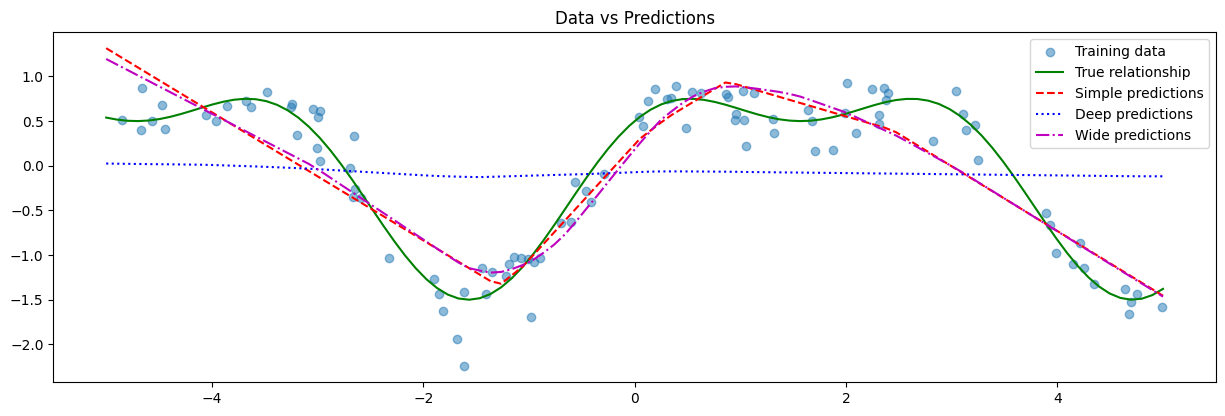

In [103]:
plt.figure(figsize=(15, 10))

# Plot 1: Data and predictions
plt.subplot(2, 1, 1)
plt.scatter(x, y, alpha=0.5, label='Training data')
plt.plot(x_plot, y_true_plot, 'g-', label='True relationship')

# Use different line styles and colors for each model
line_styles = ['--', ':', '-.']
colors = ['r', 'b', 'm']  # red, blue, magenta

for (name, result), style, color in zip(results.items(), line_styles, colors):
    y_pred_plot = result['model'](x_plot)
    plt.plot(x_plot, y_pred_plot.detach(),
             linestyle=style, 
             color=color, 
             label=f'{name} predictions')

plt.legend()
plt.title('Data vs Predictions')

## Early Stopping Strategy

In [105]:
x.shape

torch.Size([100, 1])


Training Simple model with early stopping...
Early stopping at epoch 53

Training Deep model with early stopping...
Epoch 100
Train Loss: 0.7398
Val Loss: 0.7405
Epoch 200
Train Loss: 0.7166
Val Loss: 0.7070
Epoch 300
Train Loss: 0.6743
Val Loss: 0.6555
Epoch 400
Train Loss: 0.5884
Val Loss: 0.5533
Epoch 500
Train Loss: 0.4189
Val Loss: 0.3659
Epoch 600
Train Loss: 0.2119
Val Loss: 0.1666
Epoch 700
Train Loss: 0.1295
Val Loss: 0.1290
Early stopping at epoch 728

Training Wide model with early stopping...
Epoch 100
Train Loss: 0.2643
Val Loss: 0.2100
Epoch 200
Train Loss: 0.1839
Val Loss: 0.1541
Early stopping at epoch 265


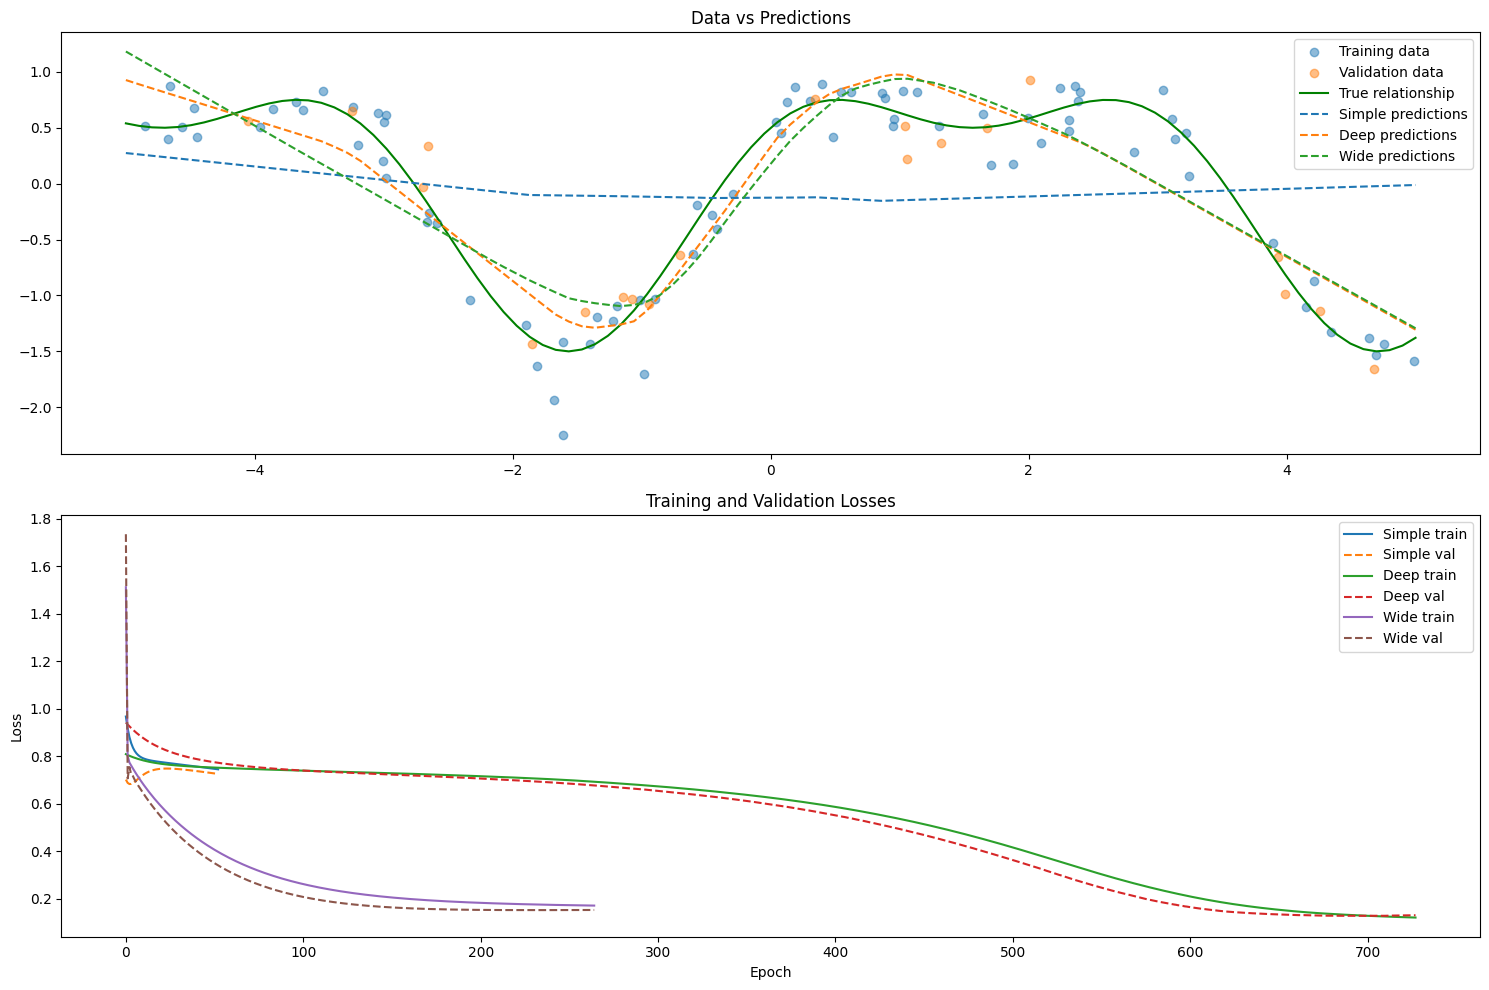

In [127]:
# First, let's split our data into train and validation sets
n_samples = 100
n_train = 80
n_val = n_samples - n_train

# Generate random indices for splitting
indices = torch.randperm(n_samples)
train_indices = indices[:n_train]
val_indices = indices[n_train:]

# Split the data
x_train = x[train_indices]
y_train = y[train_indices]
x_val = x[val_indices]
y_val = y[val_indices]

# Modified training function with early stopping
def train_with_early_stopping(model, x_train, y_train, x_val, y_val, 
                            n_epochs=10000, patience=50, min_delta=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None

    for epoch in range(n_epochs):
        # Training
        model.train()
        y_pred_train = model(x_train)
        train_loss = criterion(y_pred_train, y_train)

        # Validation
        model.eval()
        with torch.no_grad():
            y_pred_val = model(x_val)
            val_loss = criterion(y_pred_val, y_val)

        # Store losses
        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())

        # Early stopping check
        if val_loss < best_val_loss - min_delta:
            best_val_loss = val_loss
            patience_counter = 0
            best_model_state = model.state_dict().copy()
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                model.load_state_dict(best_model_state)  # Restore best model
                break

        # Backward pass and optimization
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch+1}")
            print(f"Train Loss: {train_loss.item():.4f}")
            print(f"Val Loss: {val_loss.item():.4f}")

    return train_losses, val_losses

# Train all models
models = {
    'Simple': SimpleNN(),
    'Deep': DeepNN(),
    'Wide': WideNN()
}

# Train models with early stopping
results = {}
for name, model in models.items():
    print(f"\nTraining {name} model with early stopping...")
    train_losses, val_losses = train_with_early_stopping(
        model, x_train, y_train, x_val, y_val
    )
    results[name] = {
        'model': model,
        'train_losses': train_losses,
        'val_losses': val_losses
    }

# Plot results
plt.figure(figsize=(15, 10))

# Plot 1: Data and predictions
plt.subplot(2, 1, 1)
plt.scatter(x_train, y_train, alpha=0.5, label='Training data')
plt.scatter(x_val, y_val, alpha=0.5, label='Validation data')
plt.plot(x_plot, y_true_plot, 'g-', label='True relationship')

for name, result in results.items():
    y_pred_plot = result['model'](x_plot)
    plt.plot(x_plot, y_pred_plot.detach(), '--', label=f'{name} predictions')

plt.legend()
plt.title('Data vs Predictions')

# Plot 2: Training and validation losses
plt.subplot(2, 1, 2)
for name, result in results.items():
    plt.plot(result['train_losses'], label=f'{name} train')
    plt.plot(result['val_losses'], '--', label=f'{name} val')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()